In [1]:
import pandas as pd
from pathlib import Path
import re
import seaborn as sns
from bokeh.plotting import figure, show
from bokeh.models import HoverTool
file_path = Path('data/kl.csv')

In [2]:
data_frame = pd.read_csv(file_path, encoding='ISO-8859-1').copy()

In [3]:
data_frame.values

array([[0, 158023, 'L. Messi', ..., 14.0, 8.0, '\x80226.5M'],
       [1, 20801, 'Cristiano Ronaldo', ..., 14.0, 11.0, '\x80127.1M'],
       [2, 190871, 'Neymar Jr', ..., 15.0, 11.0, '\x80228.1M'],
       ...,
       [18204, 241638, 'B. Worman', ..., 6.0, 13.0, '\x80165K'],
       [18205, 246268, 'D. Walker-Rice', ..., 8.0, 9.0, '\x80143K'],
       [18206, 246269, 'G. Nugent', ..., 12.0, 9.0, '\x80165K']],
      dtype=object)

In [4]:
data_frame_1 = pd.DataFrame(data_frame, columns=['Name', 'Wage', 'Value'])

In [5]:
data_frame_1

,Name,Wage,Value
0,L. Messi,565K,110.5M
1,Cristiano Ronaldo,405K,77M
2,Neymar Jr,290K,118.5M
3,De Gea,260K,72M
4,K. De Bruyne,355K,102M
...,...,...,...
18202,J. Lundstram,1K,60K
18203,N. Christoffersson,1K,60K
18204,B. Worman,1K,60K
18205,D. Walker-Rice,1K,60K


In [6]:
def clean_and_convert_to_float(x):
    """
    Remove non-numeric characters and convert to float.
    """
    return float(re.sub('[^\d.]', '', x))


data_frame_1['Wage'] = data_frame_1['Wage'].apply(clean_and_convert_to_float)
data_frame_1['Value'] = data_frame_1['Value'].apply(clean_and_convert_to_float)
data_frame_1['Difference'] = data_frame_1['Wage'] - data_frame_1['Value']

In [7]:
data_frame_1

,Name,Wage,Value,Difference
0,L. Messi,565.0,110.5,454.5
1,Cristiano Ronaldo,405.0,77.0,328.0
2,Neymar Jr,290.0,118.5,171.5
3,De Gea,260.0,72.0,188.0
4,K. De Bruyne,355.0,102.0,253.0
...,...,...,...,...
18202,J. Lundstram,1.0,60.0,-59.0
18203,N. Christoffersson,1.0,60.0,-59.0
18204,B. Worman,1.0,60.0,-59.0
18205,D. Walker-Rice,1.0,60.0,-59.0


In [8]:
data_frame_1.sort_values(by=['Difference'], ascending=False)

,Name,Wage,Value,Difference
0,L. Messi,565.0,110.5,454.5
7,L. Suárez,455.0,80.0,375.0
6,L. Modri?,420.0,67.0,353.0
8,Sergio Ramos,380.0,51.0,329.0
1,Cristiano Ronaldo,405.0,77.0,328.0
...,...,...,...,...
8090,J. Roa,1.0,975.0,-974.0
12051,H. Bwana,1.0,975.0,-974.0
11451,T. Kubo,1.0,975.0,-974.0
9475,J. Moreno,1.0,975.0,-974.0


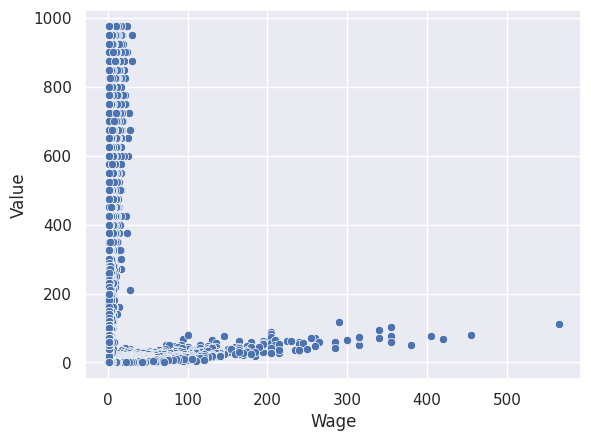

In [9]:
sns.set()
graphic = sns.scatterplot(data=data_frame_1, x='Wage', y='Value')

In [20]:
TOOLTIPS = HoverTool(tooltips=[
    ("index", "$index"),
    ("(Wage, Value)", "(@Wage, @Value)"),
    ("Name", "@Name"),
    ("Difference", "@Difference"),
])

In [21]:
plot = figure(title="FIFA Chart", x_axis_label="Wage",
              y_axis_label="Value", width=1000, height=500, tools=[TOOLTIPS])
plot.circle('Wage', 'Value', size=10, source=data_frame_1)
show(plot)

[80629:80629:0103/173844.772102:ERROR:gl_angle_util_vulkan.cc(189)] Failed to retrieve vkGetInstanceProcAddr
[80629:80629:0103/173844.772196:ERROR:vulkan_instance.cc(93)] Failed to get vkGetInstanceProcAddr pointer from ANGLE.
[80629:80629:0103/173844.775858:ERROR:gbm_wrapper.cc(75)] Failed to get fd for plane.: No such file or directory (2)
[80629:80629:0103/173844.775931:ERROR:gbm_wrapper.cc(258)] Failed to export buffer to dma_buf: No such file or directory (2)
[80629:80629:0103/173844.776041:ERROR:gbm_wrapper.cc(75)] Failed to get fd for plane.: No such file or directory (2)
[80629:80629:0103/173844.776075:ERROR:gbm_wrapper.cc(258)] Failed to export buffer to dma_buf: No such file or directory (2)
[80629:80629:0103/173844.776162:ERROR:gbm_wrapper.cc(75)] Failed to get fd for plane.: No such file or directory (2)
[80629:80629:0103/173844.776195:ERROR:gbm_wrapper.cc(258)] Failed to export buffer to dma_buf: No such file or directory (2)
[80629:80629:0103/173844.776276:ERROR:gbm_wrapp